In [1]:
#，参数 num_words=10000 将数据限定为前 10 000 个最常出现的单词
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
 num_words=10000)

In [3]:
train_data.shape

(8982,)

In [5]:
test_data.shape

(2246,)

In [11]:
#样本对应的标签是一个 0~45 范围内的整数，即话题索引编号
train_labels

array([ 3,  4,  3, ..., 25,  3, 25], dtype=int64)

In [13]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Our vectorized training data（将训练数据向量化）
x_train = vectorize_sequences(train_data)
# Our vectorized test data（将测试数据向量化）
x_test = vectorize_sequences(test_data)

In [14]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
# Our vectorized training labels（将训练标签向量化）
one_hot_train_labels = to_one_hot(train_labels)
# Our vectorized test labels（将测试标签向量化）
one_hot_test_labels = to_one_hot(test_labels)

In [15]:
#Keras 内置方法可以实现这个操作

from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [16]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [17]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [19]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 0s 31ms/step - loss: 2.6703 - accuracy: 0.5182 - val_loss: 1.7484 - val_accuracy: 0.6410
Epoch 2/20
16/16 [==============================] - 0s 18ms/step - loss: 1.4172 - accuracy: 0.7155 - val_loss: 1.2890 - val_accuracy: 0.7170
Epoch 3/20
16/16 [==============================] - 0s 18ms/step - loss: 1.0476 - accuracy: 0.7752 - val_loss: 1.1312 - val_accuracy: 0.7440
Epoch 4/20
16/16 [==============================] - 0s 18ms/step - loss: 0.8287 - accuracy: 0.8231 - val_loss: 1.0404 - val_accuracy: 0.7830
Epoch 5/20
16/16 [==============================] - 0s 18ms/step - loss: 0.6656 - accuracy: 0.8601 - val_loss: 1.0082 - val_accuracy: 0.7800
Epoch 6/20
16/16 [==============================] - 0s 18ms/step - loss: 0.5316 - accuracy: 0.8895 - val_loss: 0.9524 - val_accuracy: 0.8050
Epoch 7/20
16/16 [==============================] - 0s 18ms/step - loss: 0.4329 - accuracy: 0.9092 - val_loss: 0.9208 - val_accuracy: 0.8060
Epoch 8/20
16

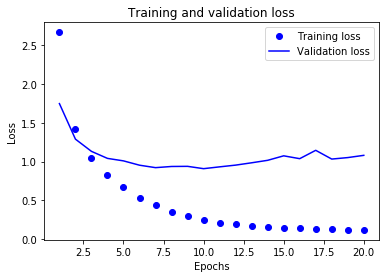

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


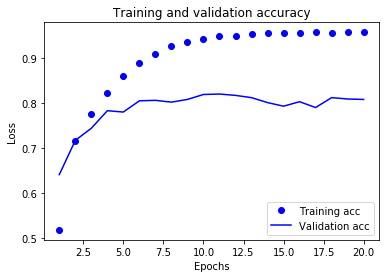

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [32]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [40]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 0s 21ms/step - loss: 2.6366 - accuracy: 0.4390 - val_loss: 1.7122 - val_accuracy: 0.6330
Epoch 2/9
16/16 [==============================] - 0s 18ms/step - loss: 1.3808 - accuracy: 0.7202 - val_loss: 1.2510 - val_accuracy: 0.7300
Epoch 3/9
16/16 [==============================] - 0s 18ms/step - loss: 1.0076 - accuracy: 0.7923 - val_loss: 1.0786 - val_accuracy: 0.7720
Epoch 4/9
16/16 [==============================] - 0s 18ms/step - loss: 0.7914 - accuracy: 0.8304 - val_loss: 0.9983 - val_accuracy: 0.7950
Epoch 5/9
16/16 [==============================] - 0s 18ms/step - loss: 0.6253 - accuracy: 0.8643 - val_loss: 0.9410 - val_accuracy: 0.8020
Epoch 6/9
16/16 [==============================] - 0s 18ms/step - loss: 0.4994 - accuracy: 0.8959 - val_loss: 0.9087 - val_accuracy: 0.8070
Epoch 7/9
16/16 [==============================] - 0s 18ms/step - loss: 0.4067 - accuracy: 0.9141 - val_loss: 0.8981 - val_accuracy: 0.8110
Epoch 8/9
16/16 [===

In [41]:
#test_loss, test_acc
results

[1.0245972871780396, 0.7756010890007019]

In [44]:
predictions = model.predict(x_test)

In [45]:
predictions[0].shape

(46,)

In [46]:
np.sum(predictions[0])

1.0000004

In [48]:
np.argmax(predictions[0])

3